In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
train_df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv')
test_df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


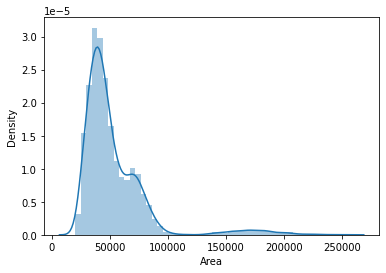

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


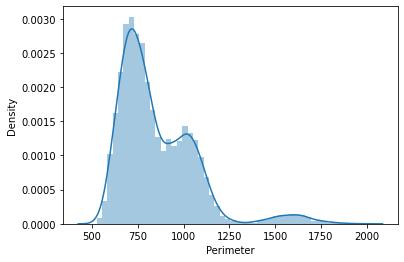

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


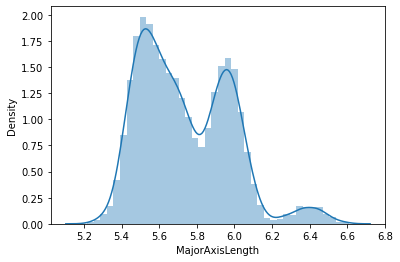

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


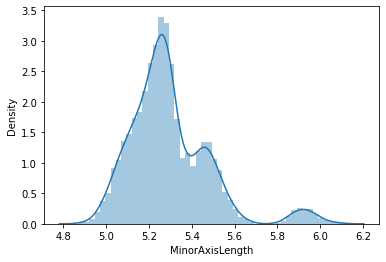

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


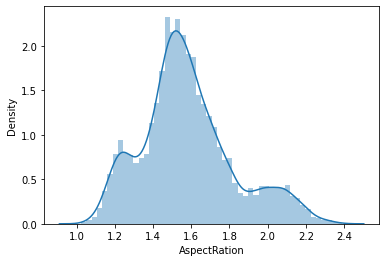

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


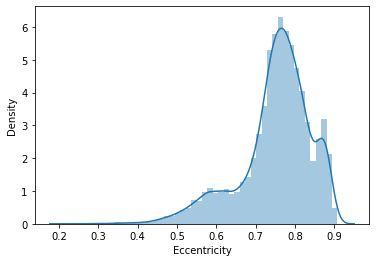

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


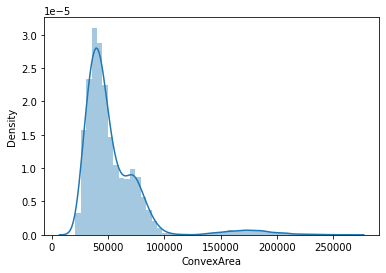

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


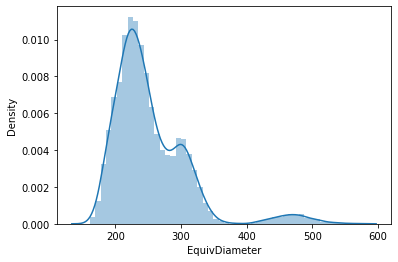

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


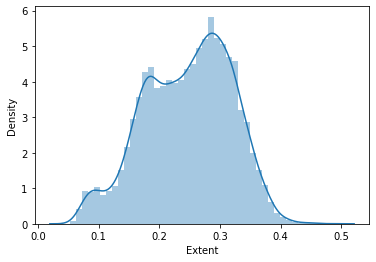

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


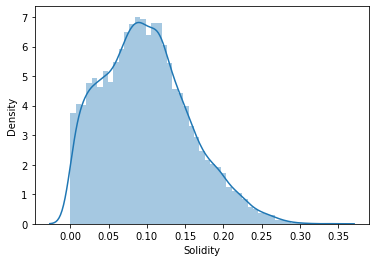

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


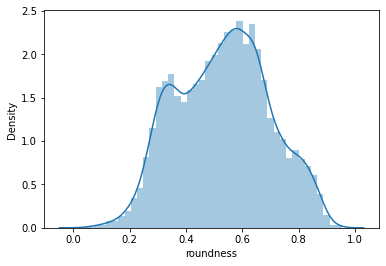

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


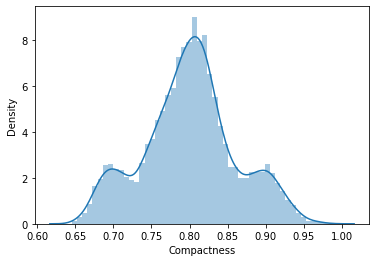

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


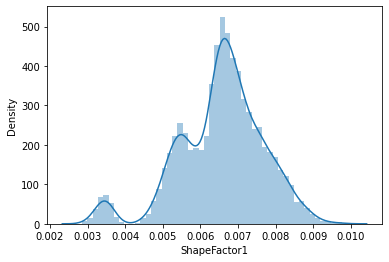

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


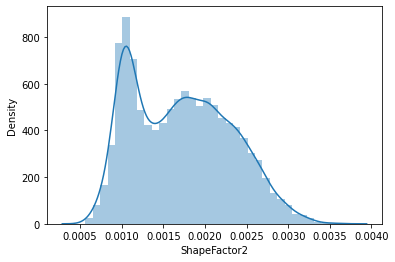

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


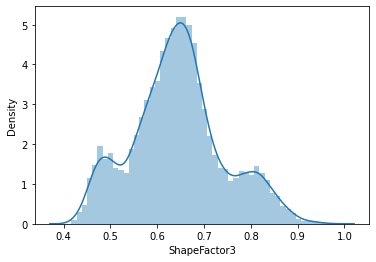

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


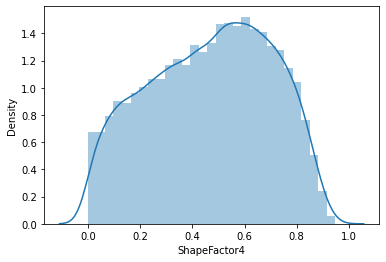

In [5]:
right_skewed_cols = ['MajorAxisLength', 'MinorAxisLength']
small_left_skewed_cols = ['Extent', 'roundness']
large_left_skewed_cols = ['Solidity','ShapeFactor4']
for col in train_df.columns:
    if col == "ID" or col =="y":
        pass
    elif col in small_left_skewed_cols :
        sns.distplot(train_df[col]**5)
        plt.show();
    elif col in large_left_skewed_cols :
        sns.distplot(train_df[col]**200)
        plt.show();
    elif col in right_skewed_cols :
        sns.distplot(np.log1p(train_df[col]))
        plt.show();
    else:
        sns.distplot(train_df[col])
        plt.show();

In [6]:
def right_transform(x):
    return np.log(x + 1)

right_transformer = FunctionTransformer(right_transform)

def small_left_transform(x):
    return x**5

small_left_transformer = FunctionTransformer(small_left_transform)

def large_left_transform(x):
    return x**200

large_left_transformer = FunctionTransformer(large_left_transform)

preprocessing = ColumnTransformer(
    [('right_skew', right_transformer, right_skewed_cols),
     ('small_left_skew', small_left_transformer, small_left_skewed_cols),
     ('large_left_skew', large_left_transformer, large_left_skewed_cols)])

In [7]:
columns=['ID', 'y', 'ConvexArea', 'Eccentricity', 'Compactness', 'ShapeFactor3', 'ShapeFactor2',
         'Perimeter', 'Area', 'EquivDiameter', 'ShapeFactor1']

X = train_df.drop(columns=columns)
y = train_df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle =True, stratify=y)

In [8]:
def plot_confusion_matrix(clf, true_values, predicted_values):
    plt.figure(figsize = (8, 7))
    sns.heatmap(confusion_matrix(true_values, predicted_values),
                annot = True,
                fmt = ".0f",
                cmap = "coolwarm",
                linewidths = 2, 
                linecolor = "white",
                xticklabels = clf.classes_,
                yticklabels = clf.classes_)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Confusion matrix on the testing data")
    plt.show()

In [9]:
minmax = MinMaxScaler()
pt = PowerTransformer()
std = StandardScaler()

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Training Accuarcy =  0.9478481596861659


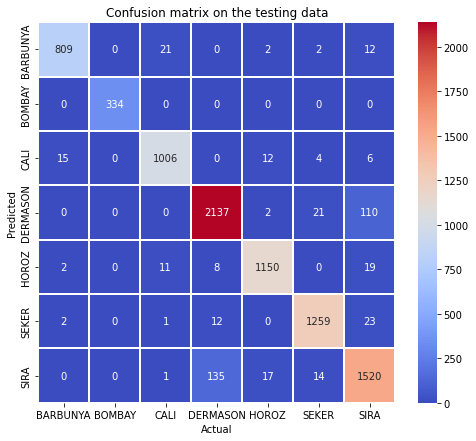

Validation Accuarcy =  0.934010152284264


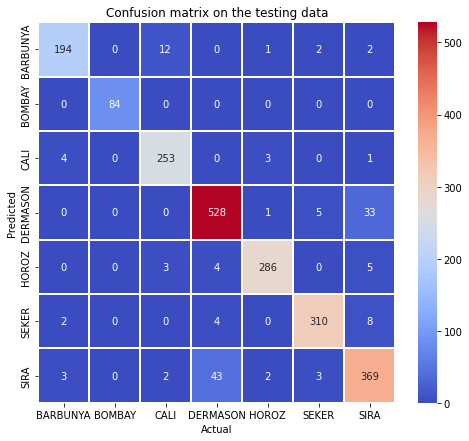

In [10]:
# SVC
svc = SVC(random_state=42, gamma=0.55, C=2,decision_function_shape='ovo', probability=True)

p1 = Pipeline([
    ("preprocessing", pt),
    ('scaler', std),
    ('classifier', svc)])

p1.fit(X_train, y_train)

y_pred = p1.predict(X_train)
print('Training Accuarcy = ', f1_score(y_train, y_pred, average='micro'))
plot_confusion_matrix(p1, y_train, y_pred)

y_pred = p1.predict(X_test)
print('Validation Accuarcy = ', f1_score(y_test, y_pred, average='micro'))
plot_confusion_matrix(p1, y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Training Accuarcy =  0.943002192223376


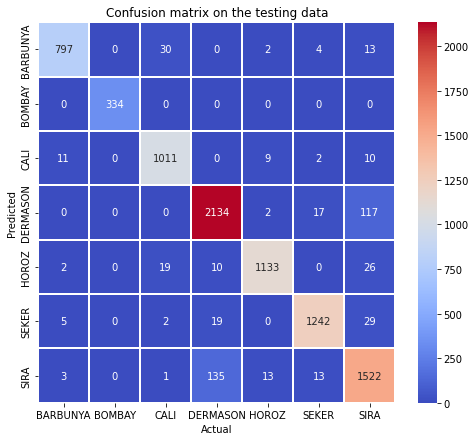

Validation Accuarcy =  0.936317489616982


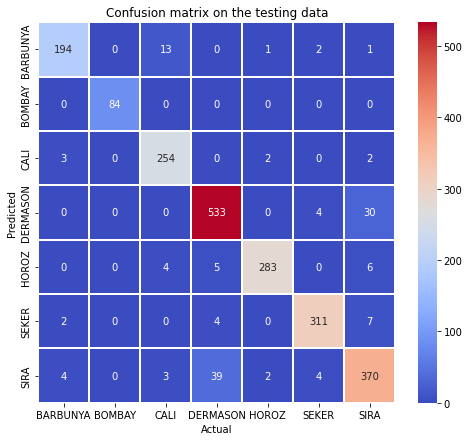

In [11]:
# MLPClassifier
mlp = MLPClassifier(random_state=42, 
                    max_iter=500)

p2 = Pipeline([
    ("preprocessing", pt),
    ('scaler', std),
    ('classifier', mlp)])

p2.fit(X_train, y_train)

y_pred = p2.predict(X_train)
print('Training Accuarcy = ', f1_score(y_train, y_pred, average='micro'))
plot_confusion_matrix(p2, y_train, y_pred)

y_pred = p2.predict(X_test)
print('Validation Accuarcy = ', f1_score(y_test, y_pred, average='micro'))
plot_confusion_matrix(p2, y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuarcy =  0.9573093342563748


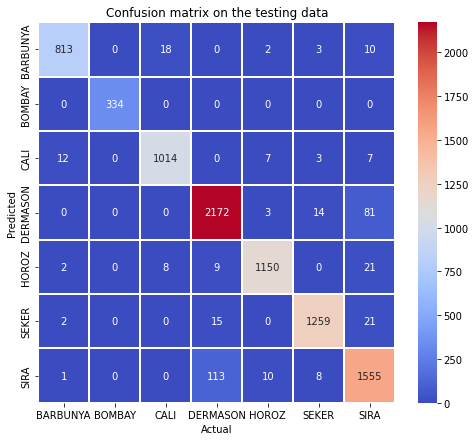

Validation Accuarcy =  0.936317489616982


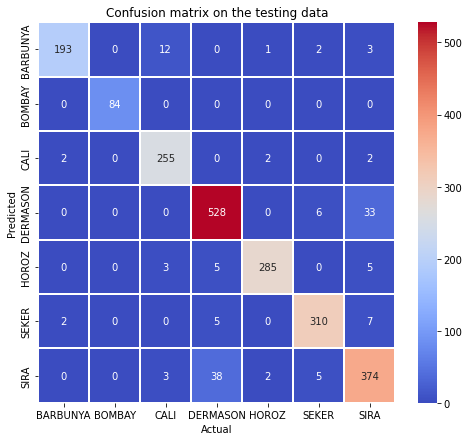

In [12]:
# params = {'n_estimators':65,
#           'learning_rate' :0.20,
#           'max_depth':7,
#           'colsample_bytree':0.92,
#          'random_state':42,
#          'verbosity':0}

# xgb = XGBClassifier(**params)

xgb = XGBClassifier(random_state=42,
                    max_depth=7, 
                    learning_rate=0.21, 
                    n_estimators=23, 
                    gamma=2.1,
                    verbosity=0)

p3 = Pipeline([
    ("preprocessing", pt),
    ('classifier', xgb)])

p3.fit(X_train, y_train)

y_pred = p3.predict(X_train)
print('Training Accuarcy = ', f1_score(y_train, y_pred, average='micro'))
plot_confusion_matrix(p3, y_train, y_pred)

y_pred = p3.predict(X_test)
print('Validation Accuarcy = ', f1_score(y_test, y_pred, average='micro'))
plot_confusion_matrix(p3, y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Training Accuarcy =  0.9666551286488981


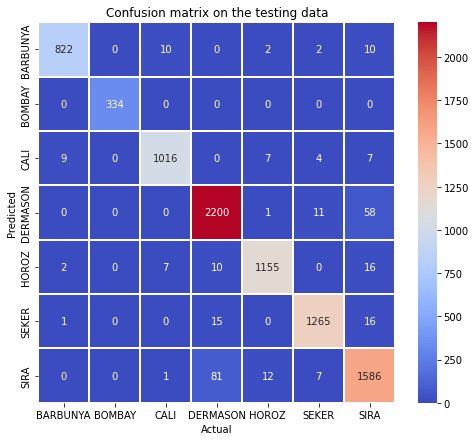

Validation Accuarcy =  0.9386248269497001


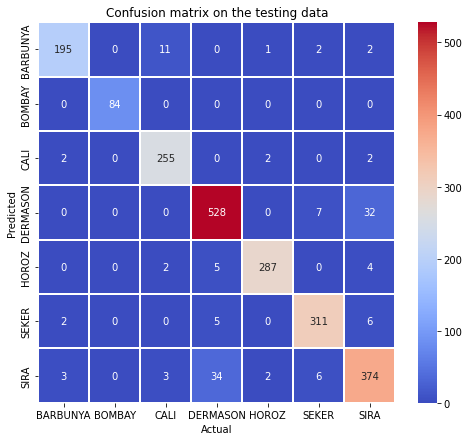

In [13]:
# LGBMClassifier
lgb = LGBMClassifier(random_state=42, 
                     n_estimators=50, 
                     reg_lambda=6, 
                     reg_alpha=1)

p4 = Pipeline([
    ("preprocessing", pt),
    ('scaler', minmax),
    ('classifier', lgb)])

p4.fit(X_train, y_train)

y_pred = p4.predict(X_train)
print('Training Accuarcy = ', f1_score(y_train, y_pred, average='micro'))
plot_confusion_matrix(p4, y_train, y_pred)

y_pred = p4.predict(X_test)
print('Validation Accuarcy = ', f1_score(y_test, y_pred, average='micro'))
plot_confusion_matrix(p4, y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in mu

Training Accuarcy =  0.9555786315910927


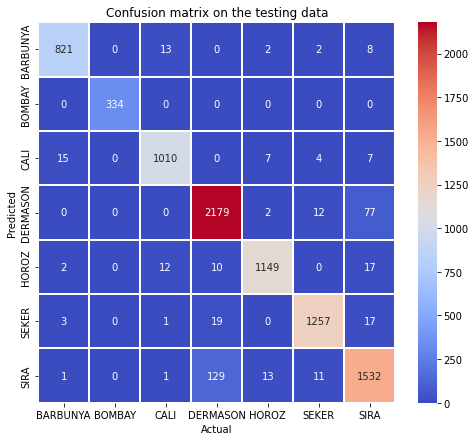

Validation Accuarcy =  0.9404706968158745


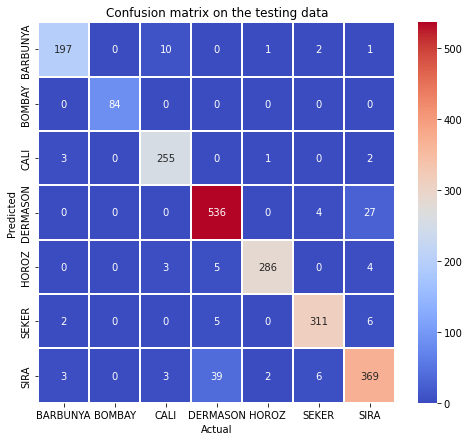

In [14]:
# VotingClassifier
classifiers = [('SVC', p1),
               ('MLP Classifier', p2), 
               ('XGB Classifier', p3),
               ('LGB Classifier', p4)]

vc = VotingClassifier(estimators=classifiers, voting='hard')

vc.fit(X_train, y_train)

y_pred = vc.predict(X_train)
print('Training Accuarcy = ', f1_score(y_train, y_pred, average='micro'))
plot_confusion_matrix(vc, y_train, y_pred)

y_pred = vc.predict(X_test)
print('Validation Accuarcy = ', f1_score(y_test, y_pred, average='micro'))
plot_confusion_matrix(vc, y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in mu

Training Accuarcy =  0.9542182019568026


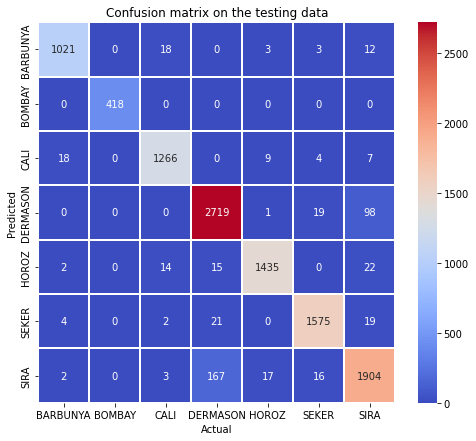

In [15]:
vc.fit(X, y)

y_pred = vc.predict(X)
print('Training Accuarcy = ', f1_score(y, y_pred, average='micro'))
plot_confusion_matrix(vc, y, y_pred)

In [16]:
columns = ['ID',
 'ConvexArea',
 'Eccentricity',
 'Compactness',
 'ShapeFactor3',
 'ShapeFactor2',
 'Perimeter',
 'Area',
 'EquivDiameter',
 'ShapeFactor1']

In [17]:
X_test = test_df.drop(columns=columns)

In [18]:
y_test_predicted = vc.predict(X_test)

test_df['y'] = y_test_predicted

test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


In [19]:
test_df[['ID', 'y']].to_csv('submission.csv', index=False)